<a href="https://colab.research.google.com/github/udaybhaskar717/Solar-Irradiance-Forecasting/blob/main/MTP_Stage_2_IITB_Floating_Solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [ ]:
import sys, os
import pandas                as pd
import numpy                 as np
import seaborn               as sns
import matplotlib.pyplot     as plt
from matplotlib.pyplot       import figure
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
import matplotlib.pyplot     as plt
import seaborn               as sns
import tensorflow as tf
sns.set_style('darkgrid')
import warnings
import datetime              as dt
import matplotlib.dates      as mdates
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from google.colab            import files
warnings.filterwarnings('ignore')

In [ ]:
import keras

# Data Exploration

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/IITB_Floating_Solar_Power_Plant.csv')

In [ ]:
data

,PeriodEnd,PeriodStart,Period,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,PrecipitableWater,RelativeHumidity,SnowWater,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily
0,2014-12-31T01:15:00Z,2014-12-31T01:00:00Z,PT15M,19.6,-112,0.8,16.9,0,0,0,0,24.3,84.3,0.0,1021.8,19,2.4,98,0.11
1,2014-12-31T01:30:00Z,2014-12-31T01:15:00Z,PT15M,19.8,-113,1.5,17.1,0,0,0,0,24.3,84.4,0.0,1022.0,20,2.4,95,0.11
2,2014-12-31T01:45:00Z,2014-12-31T01:30:00Z,PT15M,20.0,-114,2.3,17.3,0,0,0,0,24.4,84.4,0.0,1022.1,22,2.4,91,0.11
3,2014-12-31T02:00:00Z,2014-12-31T01:45:00Z,PT15M,20.1,-115,3.1,17.4,9,0,0,9,24.4,84.5,0.0,1022.3,23,2.3,88,0.11
4,2014-12-31T02:15:00Z,2014-12-31T02:00:00Z,PT15M,20.3,-117,3.8,17.6,31,0,0,31,24.4,84.6,0.0,1022.5,25,2.3,85,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279542,2022-12-20T22:45:00Z,2022-12-20T22:30:00Z,PT15M,25.1,-105,0.1,13.7,0,0,0,0,21.0,49.1,0.0,1039.0,83,2.6,131,0.11
279543,2022-12-20T23:00:00Z,2022-12-20T22:45:00Z,PT15M,25.1,-105,0.0,13.5,0,0,0,0,21.0,48.6,0.0,1039.0,85,2.7,127,0.11
279544,2022-12-20T23:15:00Z,2022-12-20T23:00:00Z,PT15M,25.0,-106,0.0,13.3,0,0,0,0,21.1,48.2,0.0,1039.1,86,2.7,124,0.11
279545,2022-12-20T23:30:00Z,2022-12-20T23:15:00Z,PT15M,25.0,-107,0.0,13.1,0,0,0,0,21.1,47.7,0.0,1039.2,85,2.7,120,0.11


In [ ]:
data['Date']=pd.to_datetime(data['PeriodStart'])

In [ ]:
data.drop(['PeriodEnd','PeriodStart','Period'],axis=1,inplace=True)

In [ ]:
data

,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,PrecipitableWater,RelativeHumidity,SnowWater,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,Date
0,19.6,-112,0.8,16.9,0,0,0,0,24.3,84.3,0.0,1021.8,19,2.4,98,0.11,2014-12-31 01:00:00+00:00
1,19.8,-113,1.5,17.1,0,0,0,0,24.3,84.4,0.0,1022.0,20,2.4,95,0.11,2014-12-31 01:15:00+00:00
2,20.0,-114,2.3,17.3,0,0,0,0,24.4,84.4,0.0,1022.1,22,2.4,91,0.11,2014-12-31 01:30:00+00:00
3,20.1,-115,3.1,17.4,9,0,0,9,24.4,84.5,0.0,1022.3,23,2.3,88,0.11,2014-12-31 01:45:00+00:00
4,20.3,-117,3.8,17.6,31,0,0,31,24.4,84.6,0.0,1022.5,25,2.3,85,0.11,2014-12-31 02:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279542,25.1,-105,0.1,13.7,0,0,0,0,21.0,49.1,0.0,1039.0,83,2.6,131,0.11,2022-12-20 22:30:00+00:00
279543,25.1,-105,0.0,13.5,0,0,0,0,21.0,48.6,0.0,1039.0,85,2.7,127,0.11,2022-12-20 22:45:00+00:00
279544,25.0,-106,0.0,13.3,0,0,0,0,21.1,48.2,0.0,1039.1,86,2.7,124,0.11,2022-12-20 23:00:00+00:00
279545,25.0,-107,0.0,13.1,0,0,0,0,21.1,47.7,0.0,1039.2,85,2.7,120,0.11,2022-12-20 23:15:00+00:00


In [ ]:
data['Date']=data.Date.dt.tz_convert('Asia/Kolkata')

In [ ]:
data_09=data[data.Date.dt.year ==2016]
data_09.iloc[-12:,:]

,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,PrecipitableWater,RelativeHumidity,SnowWater,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,Date
70234,23.6,104,0.0,20.3,0,0,0,0,17.5,81.9,0.0,1026.3,322,2.4,130,0.11,2016-12-31 21:00:00+05:30
70235,23.5,104,0.0,20.3,0,0,0,0,17.5,82.4,0.0,1026.4,325,2.3,134,0.11,2016-12-31 21:15:00+05:30
70236,23.4,104,0.0,20.3,0,0,0,0,17.5,82.9,0.0,1026.4,329,2.3,137,0.11,2016-12-31 21:30:00+05:30
70237,23.3,103,0.0,20.3,0,0,0,0,17.5,83.4,0.0,1026.5,333,2.2,141,0.11,2016-12-31 21:45:00+05:30
70238,23.2,103,0.0,20.4,0,0,0,0,17.6,83.9,0.0,1026.5,336,2.2,144,0.11,2016-12-31 22:00:00+05:30
70239,23.1,103,0.0,20.4,0,0,0,0,17.6,84.4,0.0,1026.6,340,2.2,148,0.11,2016-12-31 22:15:00+05:30
70240,23.0,103,0.0,20.4,0,0,0,0,17.6,85.0,0.0,1026.6,344,2.2,151,0.11,2016-12-31 22:30:00+05:30
70241,22.9,104,0.0,20.4,0,0,0,0,17.7,85.5,0.0,1026.6,348,2.2,154,0.11,2016-12-31 22:45:00+05:30
70242,22.8,104,0.0,20.4,0,0,0,0,17.7,86.0,0.0,1026.7,352,2.2,158,0.11,2016-12-31 23:00:00+05:30
70243,22.7,106,0.0,20.3,0,0,0,0,17.7,86.5,0.0,1026.7,356,2.2,161,0.11,2016-12-31 23:15:00+05:30


In [ ]:
data09_20 = data[(data.Date.dt.year >2016) & (data.Date.dt.year<2021)]
validation_data = data[data.Date.dt.year==2021]

In [ ]:
data17_20=data_09.iloc[-12:,:].append(data09_20)
data17_20.drop('SnowWater',axis=1,inplace=True)
validation_data.drop('SnowWater',axis=1,inplace=True)

In [ ]:
data17_20

,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,Date
70234,23.6,104,0.0,20.3,0,0,0,0,17.5,81.9,1026.3,322,2.4,130,0.11,2016-12-31 21:00:00+05:30
70235,23.5,104,0.0,20.3,0,0,0,0,17.5,82.4,1026.4,325,2.3,134,0.11,2016-12-31 21:15:00+05:30
70236,23.4,104,0.0,20.3,0,0,0,0,17.5,82.9,1026.4,329,2.3,137,0.11,2016-12-31 21:30:00+05:30
70237,23.3,103,0.0,20.3,0,0,0,0,17.5,83.4,1026.5,333,2.2,141,0.11,2016-12-31 21:45:00+05:30
70238,23.2,103,0.0,20.4,0,0,0,0,17.6,83.9,1026.5,336,2.2,144,0.11,2016-12-31 22:00:00+05:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210497,25.9,104,0.0,18.8,0,0,0,0,33.9,64.7,1042.1,0,3.1,154,0.11,2020-12-31 22:45:00+05:30
210498,25.9,104,0.0,18.8,0,0,0,0,34.8,64.6,1042.1,3,2.8,158,0.11,2020-12-31 23:00:00+05:30
210499,26.0,106,0.0,18.8,0,0,0,0,35.6,64.6,1042.0,5,2.6,161,0.11,2020-12-31 23:15:00+05:30
210500,25.9,108,0.0,18.8,0,0,0,0,36.2,64.6,1042.0,7,2.4,165,0.11,2020-12-31 23:30:00+05:30


In [ ]:
data_corr=data17_20.corr()

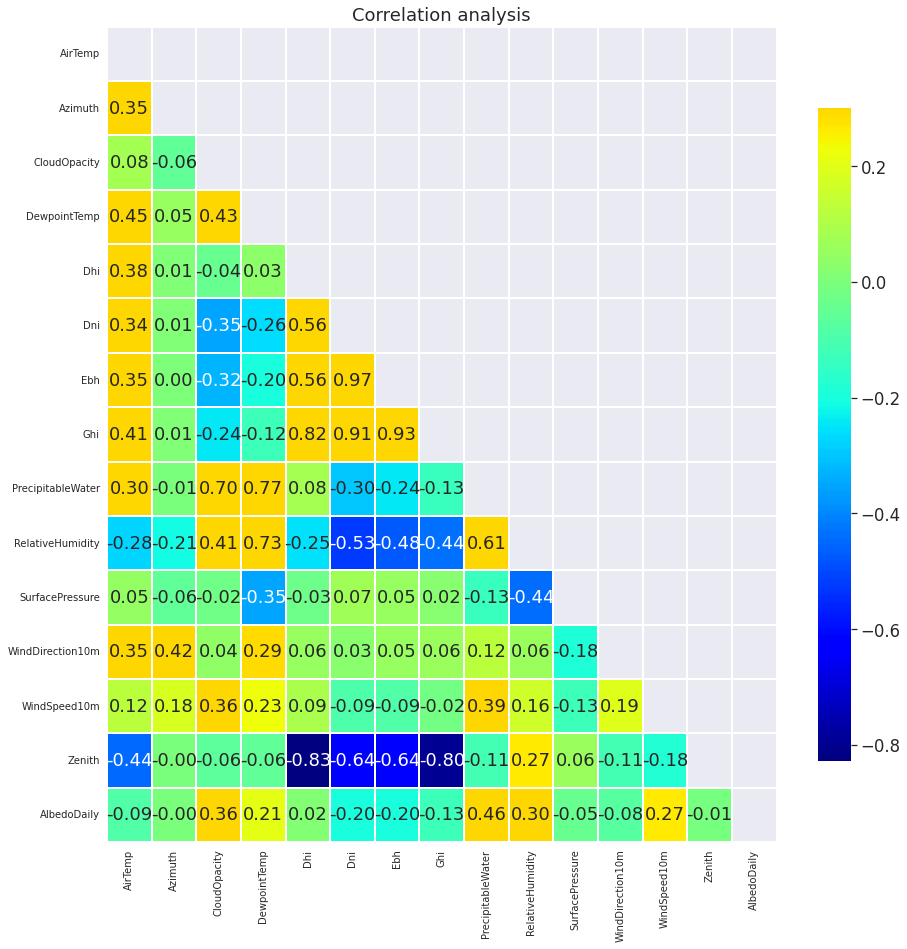

In [ ]:
mask = np.triu(np.ones_like(data_corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 15))

sns.set(font_scale=1.5)
sns.heatmap(data_corr,mask=mask,cmap='jet', vmax=.3, center=0, annot=True, fmt='.2f',
           linewidths=1, cbar_kws={"shrink": .8});
plt.title('Correlation analysis');

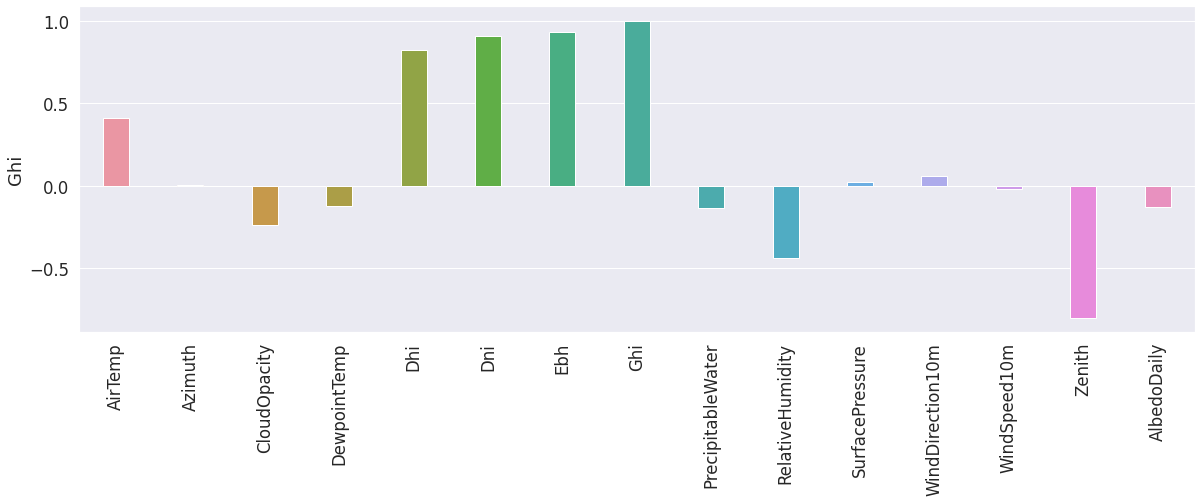

In [ ]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .5)
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x=data_corr['Ghi'].index,y=data_corr['Ghi'],ax=ax)
change_width(ax, .35)
plt.xticks(rotation=90)
sns.set(font_scale=2)
plt.show()

In [ ]:
X=data17_20.drop(["Dhi","Dni","Ebh"],axis=1)
y=data17_20['Ghi']
X_validation_data=validation_data.drop(["Dhi","Dni","Ebh"],axis=1)
y_validation_data=validation_data['Ghi']

In [ ]:
 def spliting_data(data):
  X_train=data[(data.Date.dt.year>=2019) & (data.Date.dt.year<=2021)]
  y_train=data[(data.Date.dt.year>=2019) & (data.Date.dt.year<=2021)]["Ghi"]
  X_val=data[data.Date.dt.year==2022].iloc[:-108,:]
  y_val=data[data.Date.dt.year==2022].iloc[:-108,4]
  X_test=data[data.Date.dt.year==2022].iloc[-108:,:]
  y_test=data[data.Date.dt.year==2022].iloc[-108:,4]
  return (X_train,X_val,X_test,y_train,y_val,y_test)

In [ ]:
X_train,X_val,X_test,y_train,y_val,y_test=spliting_data(data)

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X,y,train_size=2/3.0,random_state=42,shuffle=False)
# # X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5,random_state= 8,shuffle=False)

In [ ]:
X_train

,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Ghi,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,Date
70234,23.6,104,0.0,20.3,0,17.5,81.9,1026.3,322,2.4,130,0.11,2016-12-31 21:00:00+05:30
70235,23.5,104,0.0,20.3,0,17.5,82.4,1026.4,325,2.3,134,0.11,2016-12-31 21:15:00+05:30
70236,23.4,104,0.0,20.3,0,17.5,82.9,1026.4,329,2.3,137,0.11,2016-12-31 21:30:00+05:30
70237,23.3,103,0.0,20.3,0,17.5,83.4,1026.5,333,2.2,141,0.11,2016-12-31 21:45:00+05:30
70238,23.2,103,0.0,20.4,0,17.6,83.9,1026.5,336,2.2,144,0.11,2016-12-31 22:00:00+05:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163741,27.9,59,72.5,23.8,0,72.5,78.3,1035.0,247,5.4,131,0.11,2019-09-01 21:45:00+05:30
163742,27.9,57,72.5,23.8,0,72.4,78.3,1035.0,246,5.4,134,0.11,2019-09-01 22:00:00+05:30
163743,27.9,53,72.5,23.8,0,72.3,78.3,1035.0,244,5.3,136,0.11,2019-09-01 22:15:00+05:30
163744,27.9,50,72.5,23.8,0,72.3,78.6,1035.1,243,5.1,139,0.11,2019-09-01 22:30:00+05:30


In [ ]:
def data_scaling( scaling_strategy , scaling_data , scaling_columns ):
    
    if    scaling_strategy =="RobustScaler" :
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
        
    elif  scaling_strategy =="StandardScaler" :
        scaling_data[scaling_columns] = StandardScaler().fit_transform(scaling_data[scaling_columns])
        
    elif  scaling_strategy =="MinMaxScaler" :
        scaling_data[scaling_columns] = MinMaxScaler().fit_transform(scaling_data[scaling_columns])
        
    elif  scaling_strategy =="MaxAbsScaler" :
        scaling_data[scaling_columns] = MaxAbsScaler().fit_transform(scaling_data[scaling_columns])
        
    else :  # If any other scaling send by mistake still perform Robust Scalar
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
    
    return scaling_data

In [ ]:
scaling_strategy = ["RobustScaler", "StandardScaler","MinMaxScaler","MaxAbsScaler"]
X_train_scale = data_scaling( scaling_strategy[3] , X_train.drop(['Date','Ghi'],axis=1),X_train.drop(['Date','Ghi'],axis=1).columns )
X_val_scale  = data_scaling( scaling_strategy [3] ,X_val.drop(['Date','Ghi'],axis=1), X_val.drop(['Date','Ghi'],axis=1).columns)
# X_test_scale  = data_scaling( scaling_strategy [3] ,X_test.drop(['Date','Ghi'],axis=1), X_test.drop(['Date','Ghi'],axis=1).columns)
X_validation_scale=data_scaling( scaling_strategy [3] ,X_validation_data.drop(['Date','Ghi'],axis=1),X_train.drop(['Date','Ghi'],axis=1).columns)

In [ ]:
X_train_scale.head(13)

,AirTemp,Azimuth,CloudOpacity,DewpointTemp,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily
70234,0.659218,0.577778,0.0,0.740876,0.210590,0.828109,0.987207,0.894444,0.166667,0.726257,0.916667
70235,0.656425,0.577778,0.0,0.740876,0.210590,0.833165,0.987303,0.902778,0.159722,0.748603,0.916667
70236,0.653631,0.577778,0.0,0.740876,0.210590,0.838220,0.987303,0.913889,0.159722,0.765363,0.916667
70237,0.650838,0.572222,0.0,0.740876,0.210590,0.843276,0.987399,0.925000,0.152778,0.787709,0.916667
70238,0.648045,0.572222,0.0,0.744526,0.211793,0.848332,0.987399,0.933333,0.152778,0.804469,0.916667
70239,0.645251,0.572222,0.0,0.744526,0.211793,0.853387,0.987495,0.944444,0.152778,0.826816,0.916667
70240,0.642458,0.572222,0.0,0.744526,0.211793,0.859454,0.987495,0.955556,0.152778,0.843575,0.916667
70241,0.639665,0.577778,0.0,0.744526,0.212996,0.864510,0.987495,0.966667,0.152778,0.860335,0.916667
70242,0.636872,0.577778,0.0,0.744526,0.212996,0.869565,0.987591,0.977778,0.152778,0.882682,0.916667
70243,0.634078,0.588889,0.0,0.740876,0.212996,0.874621,0.987591,0.988889,0.152778,0.899441,0.916667


In [ ]:
features_train = X_train_scale.to_numpy().tolist()
target_train = y_train.to_list()
features_val = X_val_scale.to_numpy().tolist()
target_val = y_val.to_list()
# features_test = X_test_scale.to_numpy().tolist()
# target_test = y_test.to_list()
features_validation_data=X_validation_scale.to_numpy().tolist()
target_validation_data=y_validation_data.to_list()

In [ ]:
multi_train_target=pd.concat([X_train['Ghi'].shift(-i) for i in range(13)],axis=1).dropna().iloc[:,-12].to_numpy().tolist()


In [ ]:
multi_train_target=pd.concat([X_train['Ghi'].shift(-i) for i in range(13)],axis=1).iloc[:,-1].dropna().to_numpy().tolist()
multi_val_target=pd.concat([X_val['Ghi'].shift(-i) for i in range(13)],axis=1).iloc[:,-1].dropna().to_numpy().tolist()
# multi_test_target=pd.concat([X_test['Ghi'].shift(-i) for i in range(25)],axis=1).iloc[:,-1].dropna().to_numpy().tolist()
multi_validation_data_target=pd.concat([X_validation_data['Ghi'].shift(-i) for i in range(13)],axis=1).iloc[:,-1].dropna().to_numpy().tolist()

In [ ]:
train_generator = TimeseriesGenerator(features_train[:-12],multi_train_target,length=12,sampling_rate=1,batch_size=50,stride=1)
val_generator = TimeseriesGenerator(features_val[:-12],multi_val_target,length=12,sampling_rate=1,batch_size=50,stride=1)
# test_generator = TimeseriesGenerator(features_test[:-12],multi_test_target,length=24,sampling_rate=1,batch_size=256,stride=1)
validation_data_generator=TimeseriesGenerator(features_validation_data[:-12],multi_validation_data_target,length=12,sampling_rate=1,batch_size=1,stride=1)

In [ ]:
model = tf.keras.Sequential()
model.add(LSTM(30,input_shape=(train_generator[0][0].shape[1],train_generator[0][0].shape[2]),return_sequences=False))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dense(4,activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [ ]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
# from tensorflow import keras
# model=keras.models.load_model('/content/drive/MyDrive/best_model_without_dhi_dni_12.h5',custom_objects={"coeff_determination":coeff_determination})

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
mc = ModelCheckpoint('best_model.h5', monitor='val_coeff_determination', mode='max', verbose=1, save_best_only=True)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='vol_loss',patience=2,mode='min')
model.compile(loss=tf.keras.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(learning_rate=1),metrics=[coeff_determination,tf.keras.metrics.MSE])
with tf.device('/gpu:0'):
  history = model.fit(train_generator,epochs=50,validation_data=val_generator,shuffle=False,callbacks=[mc])

Epoch 1/50
1867/1870 [============================>.] - ETA: 0s - loss: 84618.6953 - coeff_determination: -118602924032.0000 - mean_squared_error: 84618.6953
Epoch 1: val_coeff_determination did not improve from -10414625792.00000
1870/1870 [==============================] - 16s 8ms/step - loss: 84549.2188 - coeff_determination: -118412648448.0000 - mean_squared_error: 84549.2188 - val_loss: 75833.4766 - val_coeff_determination: -179275218944.0000 - val_mean_squared_error: 75833.4766
Epoch 2/50
1864/1870 [============================>.] - ETA: 0s - loss: 85404.9766 - coeff_determination: -102018056192.0000 - mean_squared_error: 85404.9766
Epoch 2: val_coeff_determination did not improve from -10414625792.00000
1870/1870 [==============================] - 15s 8ms/step - loss: 85239.4141 - coeff_determination: -101690728448.0000 - mean_squared_error: 85239.4141 - val_loss: 75793.1875 - val_coeff_determination: -190468358144.0000 - val_mean_squared_error: 75793.1875
Epoch 3/50
1870/1870 [

In [ ]:
model.save('/content/drive/MyDrive/best_model_iitb_floating.h5')

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")

# Load the Model

In [ ]:
model=keras.models.load_model('/content/drive/MyDrive/best_model_without_dhi_dni_12.h5',custom_objects={"coeff_determination":coeff_determination})

# Train

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
predictions = model.predict(train_generator)
pred=predictions.reshape(-1,1)
predictions.shape
pred_=[]
for i in pred:
    pred_.append(i[0])

In [ ]:
_,R_2,mse=model.evaluate(train_generator)

In [ ]:
mean_absolute_error(pred,y_train[predictions.shape[0]*-1:])

In [ ]:
plt.plot(pred_)

In [ ]:
df_final_train = pd.DataFrame({'Predicted':pred_,'Actual':y_train[predictions.shape[0]*-1:],'Date': X_train["Date"][predictions.shape[0]*-1:]})

In [ ]:
sns.set(font_scale=2)
df_final_train.set_index('Date')[['Predicted','Actual']].iloc[96*0:96*3,:].plot(figsize=(15,6))
plt.ylabel('Ghi')

In [ ]:
df_final_train.set_index('Date')[['Predicted','Actual']].plot(figsize=(36,10))

In [ ]:
plt.scatter(y=df_final_train['Predicted'],x=df_final_train['Actual'])
z = np.polyfit(df_final_train['Actual'], df_final_train['Predicted'], 1)
p = np.poly1d(z)

# Display the Trendline
plt.plot(df_final_train['Actual'], p(df_final_train['Actual']),color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Validation

In [ ]:
predictions_val = model.predict(val_generator)
pred_val=predictions_val.reshape(-1,1)
pred_val_=[]
for i in pred_val:
    pred_val_.append(i[0])

In [ ]:
df_final_val = pd.DataFrame({'Predicted':pred_val_,'Actaul':y_val[predictions_val.shape[0]*-1:],'Date': X_val["Date"][predictions_val.shape[0]*-1:]})

In [ ]:
df_final_val.set_index('Date')[['Predicted','Actaul']].iloc[0:96*10,:].plot(figsize=(36,10))

In [ ]:
_,R_2,mse=model.evaluate(val_generator)

In [ ]:
mean_absolute_error(pred_val_,y_val[predictions_val.shape[0]*-1:])

# Test

In [ ]:
# predictions_test = model.predict(test_generator)
# pred_test=predictions_test.reshape(-1,1)
# pred_test_=[]
# for i in pred_test:
#     pred_test_.append(i[0])

In [ ]:
# df_final_test = pd.DataFrame({'Predicted':pred_test_,'Actaul':y_test[predictions_test.shape[0]*-1:],'Date': X_test["Date"][predictions_test.shape[0]*-1:]})

In [ ]:
# df_final_test.set_index('Date')[['Predicted','Actaul']].iloc[0:96*10,:].plot(figsize=(36,10))

In [ ]:
# df_final_test.set_index('Date')[['Predicted','Actaul']].iloc[96*3:96*4,:].plot(figsize=(36,10))

In [ ]:
# _,R_2,mse=model.evaluate(test_generator)

In [ ]:
# mean_absolute_error(pred_test_,y_test[predictions_test.shape[0]*-1:])

# Model Validation

In [ ]:
predictions_validation = model.predict(validation_data_generator)
pred_validation=predictions_validation.reshape(-1,1)
pred_validation_=[]
for i in pred_validation:
    pred_validation_.append(i[0])

In [ ]:
df_validation = pd.DataFrame({'Predicted':pred_validation_,'Actual':y_validation_data[predictions_validation.shape[0]*-1:],'Date': X_validation_data["Date"][pred_validation.shape[0]*-1:]})

In [ ]:
df_validation

In [ ]:
df_validation.set_index('Date')[['Predicted','Actual']].iloc[96*0:96*10,:].plot(figsize=(15,6))
plt.ylabel('Ghi')

In [ ]:
df_validation.set_index('Date')[['Predicted','Actual']].iloc[96*0:96*1,:].plot(figsize=(10,5))
plt.ylabel('Ghi')

In [ ]:
df_validation.set_index('Date')[['Predicted','Actual']].iloc[96*1:96*2,:].plot(figsize=(10,5))
plt.ylabel('Ghi')

In [ ]:
_,R_2,mse=model.evaluate(validation_data_generator)

In [ ]:
mean_absolute_error(pred_validation_,y_validation_data[pred_validation.shape[0]*-1:])

# Merging

In [ ]:
validation_data

In [ ]:
df_validation

In [ ]:
resulted_Data_frame=pd.merge(validation_data.drop('Ghi',axis=1), df_validation.iloc[:,:-2], left_index=True, right_index=True)

In [ ]:
resulted_Data_frame.to_csv('PredictedGHI.csv')